<a href="https://colab.research.google.com/github/ankitkush1487/Machine-Learning/blob/main/Bagging_%26_Boosting_KNN_%26_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

The fundamental idea of ensemble techniques is to combine multiple models to improve accuracy and reliability over a single model. Bagging builds multiple models independently and in parallel using random subsets of the data to reduce variance and prevent overfitting. Boosting, however, builds models sequentially, with each new model focusing on correcting the errors of the previous ones to reduce bias

**Bagging (Bootstrap Aggregating):**

Trains models in parallel on random subsets of data (with replacement).

Aims to reduce variance and prevent overfitting.

All models are independent of each other.

Final prediction is made by averaging (for regression) or majority voting (for classification).

Example: Random Forest.

**Boosting:**

Trains models sequentially, each focusing on the errors of the previous one.

Aims to reduce bias and improve accuracy.

Each new model is dependent on previous models.

Final prediction is a weighted combination of all models.

Example: AdaBoost, Gradient Boosting, XGBoost.

**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process**


The Random Forest Classifier reduces overfitting compared to a single decision tree through a process of ensemble learning, specifically leveraging two key techniques: bagging (bootstrap aggregating) and random subspace.

**Reduction of Overfitting:**
**Bagging (Bootstrap Aggregating):**

 Random Forest builds multiple decision trees, each trained on a different bootstrap sample (random sampling with replacement) of the original training data. This means each tree sees a slightly different subset of the data, introducing diversity. By averaging or taking a majority vote of the predictions from these diverse trees, the Random Forest smooths out the individual errors and biases that might arise from a single tree overfitting to specific noise or patterns in its particular training subset.

**Random Subspace (Feature Randomness):**

 In addition to data randomness, Random Forest also introduces feature randomness. At each node split during the construction of a tree, only a random subset of features is considered for finding the best split. This further decorrelates the individual trees, preventing them from all relying on the same dominant features and making similar errors. This reduces the variance of the overall model without significantly increasing bias.

**Role of Key Hyperparameter**s:

n_estimators (Number of Trees): This hyperparameter controls the number of decision trees in the forest. Increasing n_estimators generally leads to a more robust model and further reduces overfitting, as more diverse trees contribute to the final prediction, averaging out individual tree biases. However, too many trees can increase computational cost without significant performance gains.

max_features (Number of Features to Consider at Each Split): This hyperparameter dictates the size of the random subset of features considered at each split point in an individual tree. A smaller max_features value increases the randomness and decorrelation among trees, making them less prone to overfitting to specific features. Common choices include sqrt(n_features) for classification tasks or n_features for regression, where n_features is the total number of features.

**Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case**

Stacking, or stacked generalization, is an ensemble learning technique that combines the predictions of multiple diverse models (base models) to create a more robust and accurate final prediction. The core idea is to use a "meta-model" or "meta-learner" to learn how to best combine the predictions of the base models.

**How it differs from traditional Bagging/Boosting methods:**

Heterogeneity of Base Models: Stacking typically employs heterogeneous base models (e.g., a decision tree, a support vector machine, and a logistic regression), whereas bagging (like Random Forest) and boosting (like AdaBoost or Gradient Boosting) primarily use homogeneous base models (e.g., multiple decision trees).

**Combination Strategy:** In stacking, a separate meta-model learns the optimal way to combine the predictions of the base models. In contrast, bagging combines predictions through averaging (for regression) or voting (for classification), and boosting combines them sequentially, giving more weight to misclassified instances.

Sequential vs. Parallel Training: Bagging trains base models in parallel, while boosting trains them sequentially, with each subsequent model attempting to correct the errors of its predecessors. Stacking involves training base models in parallel, and then training the meta-model on their predictions.

**Simple Example Use Case:**
Consider a problem of classifying emails as spam or not spam.
Base Models: Train three different base models on the email dataset:

A Logistic Regression model.

A Support Vector Machine (SVM).

A Random Forest classifier.

**Generate Predictions:**

Each of these base models will make predictions (e.g., probabilities of an email being spam) on the training data (typically using out-of-fold predictions to prevent data leakage).
Meta-Model Training: These predictions from the base models then serve as input features for a new, "meta-model" (e.g., a simple Logistic Regression or a Neural Network). This meta-model learns how to best combine the predictions of the base models to make the final classification.

**Final Prediction:** When a new email arrives, all three base models predict its spam probability, and these predictions are fed into the trained meta-model, which then outputs the final spam/not-spam classification

**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**


The Out-of-Bag (OOB) score is a performance metric for Random Forests, calculated using data points that were not used to train each individual decision tree. It provides an estimate of the model's accuracy on unseen data, allowing for model evaluation without needing a separate validation set. This is useful because each tree makes predictions on the OOB samples it was "bagged" from, and the final OOB score is an average of these predictions across all trees.

How it works

Bootstrap sampling: When a Random Forest is built, each decision tree is trained on a random subset of the original training data, with replacement (called bootstrapping).
OOB samples: On average, about one-third of the original data points are left out of the training set for each tree; these are the "out-of-bag" samples.

**Prediction on OOB data:**

 For each tree, the OOB samples are used to make predictions. The final prediction for an OOB sample is made by aggregating the predictions from all trees that did not include that sample in their training set (often through a majority vote).
OOB score calculation: The final prediction for each OOB sample is compared to its true value, and the overall OOB score is the average accuracy across all of these OOB samples.

Why it's useful

Eliminates the need for a separate validation set: The OOB score acts as an internal validation, providing a reliable estimate of how the model will perform on new data, without requiring you to hold out a portion of your data for validation.
Provides an unbiased estimate of generalization error: Because OOB samples were never seen during the training of a specific tree, they serve as a proxy for test data, giving an unbiased estimate of the model's generalization performance.
Useful for model selection and tuning: The OOB score can be used to compare different models or tune hyperparameters without performing a full cross-validation, which can be time-consuming.

**Question 5: Compare AdaBoost and Gradient Boosting in terms of:**

**● How they handle errors from weak learners**

**● Weight adjustment mechanism**

● **Typical use cases**

**1. How they handle errors from weak learners**

**AdaBoost:** Focuses on samples that were misclassified by previous weak learners.

**Gradient Boosting:** Focuses on the residual errors (the difference between predicted and actual values).

AdaBoost: Increases attention to the wrongly classified points in the next iteration.

Gradient Boosting:Trains the next weak learner to predict the residuals of the previous model.

**2. Weight adjustment mechanism**

AdaBoost: Assigns a weight to every training instance.

AdaBoost: After each round, it increases the weight of misclassified samples and decreases the weight of correctly classified ones.

AdaBoost: Each weak learner also gets a weight based on how accurate it was — better learners have higher influence.

Gradient Boosting: Does not explicitly assign weights to samples.

Gradient Boosting: Instead, it computes gradients (residuals) of the loss function to guide the next learner.

Gradient Boosting: Each learner’s contribution is scaled by a learning rate to control the update strength.

3. **Typical use cases**

AdaBoost: Works best for simple binary classification tasks.

AdaBoost: Commonly used with decision stumps or shallow trees.

Gradient Boosting: Handles both regression and classification problems.

Gradient Boosting: Performs better on complex, noisy, or high-dimensional data.

AdaBoost: Easier to interpret but less flexible.

Gradient Boosting: More powerful, tunable, and forms the basis of modern algorithms like XGBoost, LightGBM, and CatBoost.

**Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

CatBoost performs well on categorical features without extensive preprocessing because it has innovative, built-in methods for handling and encoding them automatically, which mitigates the need for manual, potentially error-prone preprocessing steps like one-hot or label encoding. This native capability is one of its primary advantages over other gradient-boosting algorithms.

**Handling of Categorical Variables**
CatBoost employs a special form of target-based encoding, known as Ordered Target Encoding (or Ordered TS), to convert categorical variables into numerical values.

**Automatic Conversion:** CatBoost automatically identifies and converts categorical features to a numerical format during the training process, requiring the user only to specify which columns are categorical using the cat_features parameter.

**Ordered Encoding:**To prevent target leakage and overfitting, which can occur with traditional target encoding methods, CatBoost uses an ordering principle inspired by online learning. For each example in the dataset, the target statistics (e.g., mean of the target variable) for a specific category are calculated using only the data points that appeared before the current example in a random permutation of the dataset.

**Feature Combinations:** CatBoost can automatically generate combinations of categorical features to capture complex interactions within the data, often leading to improved model performance without the need for manual feature engineering.
One-Hot Encoding for Low Cardinality: For categorical features with a small number of unique values (below a certain threshold, e.g., 255 for GPU training or 2 for CPU by default), CatBoost uses one-hot encoding, as this is more efficient and less prone to issues in such cases

**Question 7:KNN Classifier Assignment:Wine Dataset Analysis with Optimization**

**Task:**

**1. Load the Wine dataset (sklearn.datasets.load_wine()).**

**2. Split data into 70% train and 30% test.**

**3. Train a KNN classifier (default K=5) without scaling and evaluate using:**

**a. Accuracy**

**b. Precision, Recall, F1-Score (print classification report)**

**4. Apply StandardScaler, retrain KNN, and compare metrics.**

**5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric(Euclidean, Manhattan)**

**6. Train the optimized KNN and compare results with the unscaled/scaled versions.**



In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a KNN classifier (default K=5) without scaling and evaluate
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("--- KNN without Scaling (K=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_unscaled):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_unscaled))

# 4. Apply StandardScaler, retrain KNN, and compare metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n--- KNN with StandardScaler (K=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find the best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train) # Use scaled data for GridSearchCV

best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']

print(f"\nBest K found by GridSearchCV: {best_k}")
print(f"Best distance metric found by GridSearchCV: {best_metric}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# 6. Train the optimized KNN and compare results
knn_optimized = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_optimized.fit(X_train_scaled, y_train)
y_pred_optimized = knn_optimized.predict(X_test_scaled)

print("\n--- Optimized KNN (Best K and Metric) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))

--- KNN without Scaling (K=5) ---
Accuracy: 0.7407
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


--- KNN with StandardScaler (K=5) ---
Accuracy: 0.9630
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


Best K found by GridSearchCV: 1
Best distance metric found by GridSearchCV: manhatta

**Question 8 :PCA + KNN with Variance Analysis and Visualization**

**Task:**

**1. Load the Breast Cancer dataset (sklearn.datasets
load_breast_cancer()).**

**2. Apply PCA and plot the scree plot (explained variance ratio).**

**3. Retain 95% variance and transform the dataset.**

**4. Train KNN on the original data and PCA-transformed data, then compare accuracy.**

**5. Visualize the first two principal components using a scatter plot (color by class).**


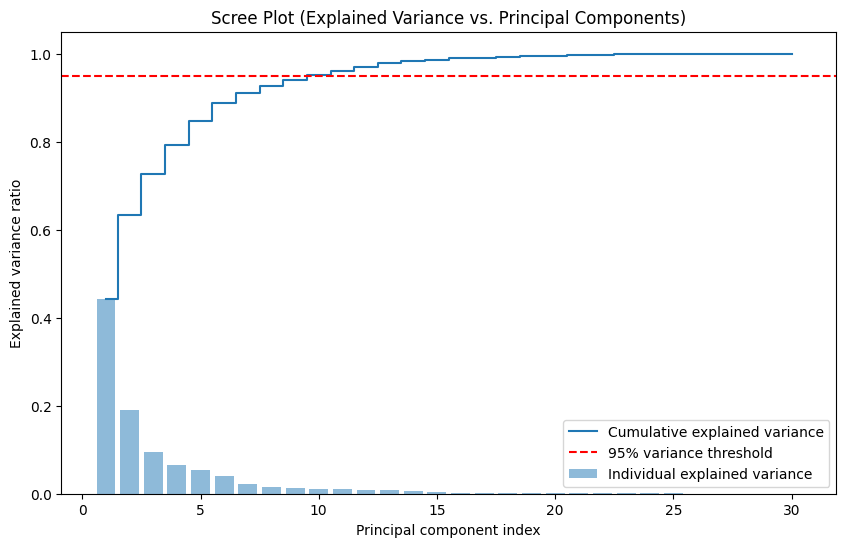

Number of components to retain 95% variance: 10
KNN Accuracy on original data: 0.9591
KNN Accuracy on PCA-transformed data (95% variance): 0.9649


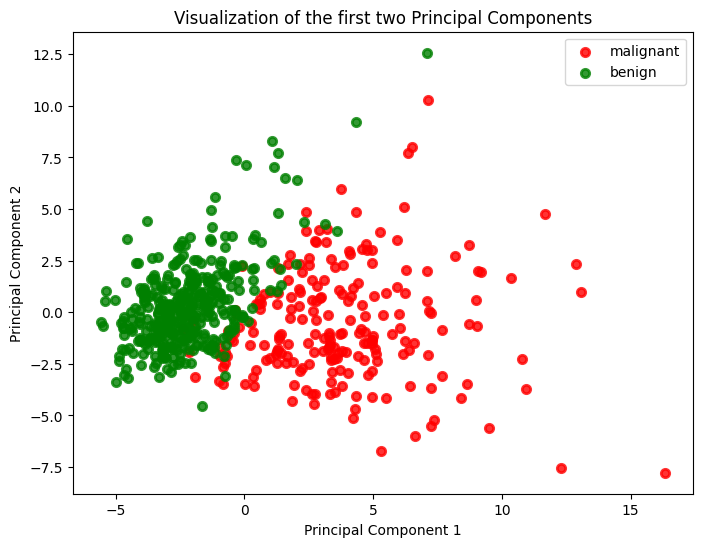

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

# Standardize the data (important for PCA and KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the original scaled data into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 2. Apply PCA and plot the scree plot (explained variance ratio)
# Apply PCA with all components to analyze variance
pca_full = PCA(n_components=None) # n_components=None keeps all features (30 in this case)
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot (Explained Variance vs. Principal Components)')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.legend(loc='best')
plt.show()

# 3. Retain 95% variance and transform the dataset
# Determine the number of components to retain 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components_95}")

# Apply PCA with the selected number of components
pca_95 = PCA(n_components=num_components_95)
X_pca_scaled = pca_95.fit_transform(X_scaled)

# Split the PCA-transformed data into training and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_scaled, y, test_size=0.3, random_state=42
)

# 4. Train KNN on the original data and PCA-transformed data, then compare accuracy
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = knn_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f"KNN Accuracy on original data: {accuracy_orig:.4f}")

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"KNN Accuracy on PCA-transformed data (95% variance): {accuracy_pca:.4f}")

# 5. Visualize the first two principal components using a scatter plot
plt.figure(figsize=(8, 6))
# We use the full PCA transformed data for visualization to see the complete distribution
X_pca_2_components = PCA(n_components=2).fit_transform(X_scaled)
colors = ['r', 'g']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(
        X_pca_2_components[y == i, 0], X_pca_2_components[y == i, 1],
        color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of the first two Principal Components')
plt.show()


**Question 9:KNN Regressor with Distance Metrics and K-Value Analysis**

**Task:**
**1. Generate a synthetic regression dataset**
**(sklearn.datasets.make_regression(n_samples=500, n_features=10)).**

**2. Train a KNN regressor with:**

**a. Euclidean distance (K=5)**

**b. Manhattan distance (K=5)**

**c. Compare Mean Squared Error (MSE) for both.**

**3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.**

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
print(f"Mean Squared Error (Euclidean, K=5): {mse_euclidean:.2f}")

# Train KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
print(f"Mean Squared Error (Manhattan, K=5): {mse_manhattan:.2f}")

if mse_euclidean < mse_manhattan:
    print("Euclidean distance yielded a lower MSE for K=5.")
elif mse_manhattan < mse_euclidean:
    print("Manhattan distance yielded a lower MSE for K=5.")
else:
    print("Both distance metrics yielded similar MSE for K=5.")

Mean Squared Error (Euclidean, K=5): 4600.79
Mean Squared Error (Manhattan, K=5): 5425.15
Euclidean distance yielded a lower MSE for K=5.


Mean Squared Error (K=1): 7081.69
Mean Squared Error (K=5): 4600.79
Mean Squared Error (K=10): 5078.06
Mean Squared Error (K=20): 5890.61
Mean Squared Error (K=50): 7793.42


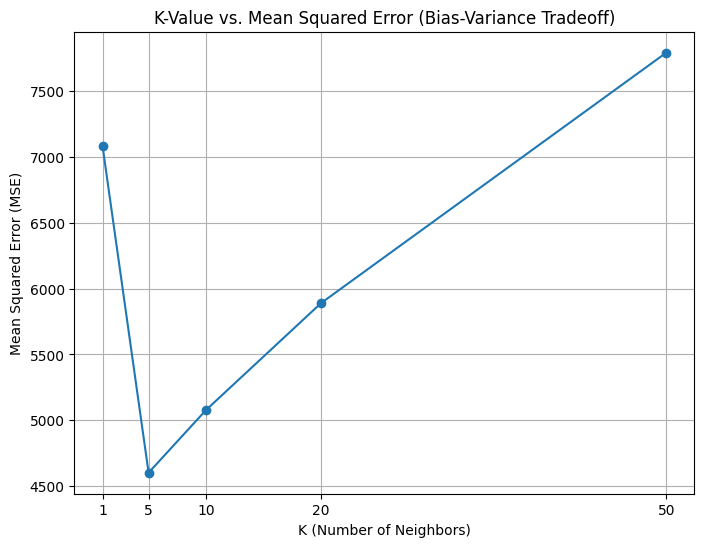

In [5]:
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean') # Using Euclidean for consistency
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Mean Squared Error (K={k}): {mse:.2f}")

# Plot K vs. MSE
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-')
plt.title('K-Value vs. Mean Squared Error (Bias-Variance Tradeoff)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).


In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# 1. Load the Pima Indians Diabetes dataset
# Replace 0s with NaN in specific columns as they represent missing values
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv('https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv', names=column_names)

# Identify columns where 0s should be treated as missing values
cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace_zero] = df[cols_to_replace_zero].replace(0, np.nan)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Use KNN Imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.3, random_state=42)

# 3. Train KNN using Brute-force, KD-Tree, and Ball Tree
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    print(f"Training KNN with algorithm: {method}")
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)

    start_time = time.time()
    knn.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[method] = {'training_time': training_time, 'accuracy': accuracy}

# 4. Compare their training time and accuracy
print("\n--- KNN Performance Comparison ---")
for method, data in results.items():
    print(f"Method: {method}")
    print(f"  Training Time: {data['training_time']:.4f} seconds")
    print(f"  Accuracy: {data['accuracy']:.4f}")

# Determine the best-performing method based on accuracy (and potentially time)
best_method = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest performing method: {best_method} with accuracy: {results[best_method]['accuracy']:.4f}")

# 5. Plot the decision boundary for the best-performing method (use 2 most important features)
# For simplicity, we'll select the first two features after imputation.
# In a real-world scenario, feature importance analysis would be performed.
feature_names = X_imputed_df.columns
feature_1_index = 1 # Glucose
feature_2_index = 5 # BMI

X_plot = X_imputed_df[[feature_names[feature_1_index], feature_names[feature_2_index]]].values
y_plot = y.values

# Retrain the best model with only the selected two features for plotting
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y_plot, test_size=0.3, random_state=42)

best_knn_plot = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
best_knn_plot.fit(X_train_plot, y_train_plot)

plt.figure(figsize=(10, 7))
plot_decision_regions(X=X_train_plot, y=y_train_plot, clf=best_knn_plot, legend=2)
plt.xlabel(feature_names[feature_1_index])
plt.ylabel(feature_names[feature_2_index])
plt.title(f'KNN Decision Boundary ({best_method} - {feature_names[feature_1_index]} vs {feature_names[feature_2_index]})')
plt.show()

ValueError: could not convert string to float: 'Pregnancies'